In [205]:

import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [206]:
avivo_data = pd.read_excel(r'/Users/mbenkhal/Documents/Avivo/code and data/latest_dataset.xlsx','Sheet3')
avivo_data.head(5)

,Program,Client.Number,Reason.for.Discharge,CHSR.Dimension.1,CHSR.Dimension.2,CHSR.Dimension.3,CHSR.Dimension.4,CHSR.Dimension.5,CHSR.Dimension.6,CPS.involvement.results.from,...,Number.of.self.help.programs.attended.in.past.30.days,Reason.for.Discharge.1,Substance.abuse.problem.at.Discharge,Where.client.has.been.living.in.past.30.days,Age,Sex,Race,Form.Flag,number_hours,status
3576,Treatment - IDD Women,111158042,Patient left without staff approval,Minor problem,Minor problem,Moderate problem,Serious problem,Serious problem,Serious problem,Unknown,...,Unknown,Patient left without staff approval,Alcohol,Dependent living - dependent children and/or a...,42,Female,Black or African American,discharge,11.0,0
3577,Treatment - IDD Men,111162034,Patient conduct (behavioral),Serious problem,Minor problem,Serious problem,Moderate problem,Extreme problem,Extreme problem,Unknown,...,No attendance,Patient conduct (behavioral),Heroin,Dependent living - dependent children and/or a...,25,Male,White,discharge,26.0,0
3578,Treatment - Family - Outpatient,111165090,Patient conduct (behavioral),Minor problem,Moderate problem,Minor problem,Minor problem,Moderate problem,Serious problem,Alleged abuse or neglect by client,...,No attendance,Patient conduct (behavioral),Methamphetamine,Homeless - no fixed address (includes shelters),27,Female,American Indian or Alaska Native,discharge,121.0,0
3573,Treatment - IDD Women,111166006,Patient left without staff approval,Unable to assess,Unable to assess,Unable to assess,Unable to assess,Unable to assess,Unable to assess,Unknown,...,Unknown,Patient left without staff approval,Alcohol,Unknown,29,Female,American Indian or Alaska Native,discharge,2.0,0
3574,Treatment - IDD Women,9294,Patient left without staff approval,No problem,Minor problem,Moderate problem,Minor problem,Moderate problem,Serious problem,Unknown,...,Unknown,Patient left without staff approval,Marijuana/Hashish,Dependent living - dependent children and/or a...,28,Male,Black or African American,discharge,21.0,0


In [207]:
avivo_data =  avivo_data.drop(['Client.Number'], axis =1)


In [208]:
avivo_data = avivo_data.drop(['Form.Flag'],axis =1)

In [209]:
avivo_data = avivo_data.drop(['Reason.for.Discharge'],axis =1)

In [210]:
avivo_data = avivo_data.drop(['Reason.for.Discharge.1'],axis =1)

In [211]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
avivo_data['Race'] = le.fit_transform(avivo_data['Race'].astype(str))
avivo_data['Race'].head(5)

3576     5
3577    16
3578     0
3573     0
3574     5
Name: Race, dtype: int64

In [212]:
list(avivo_data)

['Program',
 'CHSR.Dimension.1',
 'CHSR.Dimension.2',
 'CHSR.Dimension.3',
 'CHSR.Dimension.4',
 'CHSR.Dimension.5',
 'CHSR.Dimension.6',
 'CPS.involvement.results.from',
 'Current.labor.force.status',
 'Currently.involved.with.CPS',
 'Does.client.have.children',
 'DSM.CD.Diagnosis',
 'DSM.CD.Diagnosis..Secondary.',
 'Enrolled.in.school.or.job.training',
 'Number.of.children',
 'Number.of.children.client.lost.parental.rights.to',
 'Number.of.children.living.elsewhere',
 'Number.of.self.help.programs.attended.in.past.30.days',
 'Substance.abuse.problem.at.Discharge',
 'Where.client.has.been.living.in.past.30.days',
 'Age',
 'Sex',
 'Race',
 'number_hours',
 'status']

In [213]:
for column in avivo_data:
    if (not (np.issubdtype(type(avivo_data.iloc[0][column]), np.integer) or np.issubdtype(type(avivo_data.iloc[0][column]), np.float) )):
        avivo_data[column] = le.fit_transform(avivo_data[column].astype(str))
        

In [214]:
avivo_data.head(5)

,Program,CHSR.Dimension.1,CHSR.Dimension.2,CHSR.Dimension.3,CHSR.Dimension.4,CHSR.Dimension.5,CHSR.Dimension.6,CPS.involvement.results.from,Current.labor.force.status,Currently.involved.with.CPS,...,Number.of.children.client.lost.parental.rights.to,Number.of.children.living.elsewhere,Number.of.self.help.programs.attended.in.past.30.days,Substance.abuse.problem.at.Discharge,Where.client.has.been.living.in.past.30.days,Age,Sex,Race,number_hours,status
3576,2,1,1,2,4,4,4,5,5,2,...,7,10,6,0,1,42,0,5,11.0,0
3577,1,4,1,4,2,0,0,5,5,2,...,7,10,4,5,1,25,1,16,26.0,0
3578,0,1,2,1,1,2,4,0,5,3,...,2,4,4,8,2,27,0,0,121.0,0
3573,2,5,5,5,5,5,5,5,10,2,...,7,10,6,0,4,29,0,0,2.0,0
3574,2,3,1,2,1,2,4,5,2,2,...,7,10,6,7,1,28,1,5,21.0,0


In [215]:
#comment

In [216]:
X = avivo_data.values[:,0:23]
Y =  avivo_data.values[:,24]

In [217]:
avivo_data.shape

(1456, 25)

In [218]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 100)

In [219]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=10, min_samples_leaf=10)

In [220]:


clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

In [221]:
clf_gini_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=10, min_samples_leaf=10)

In [222]:
clf_gini_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

In [224]:
avivo = avivo_data.drop(['status'],axis = 1)
features=list(avivo.columns.values) 
features

['Program',
 'CHSR.Dimension.1',
 'CHSR.Dimension.2',
 'CHSR.Dimension.3',
 'CHSR.Dimension.4',
 'CHSR.Dimension.5',
 'CHSR.Dimension.6',
 'CPS.involvement.results.from',
 'Current.labor.force.status',
 'Currently.involved.with.CPS',
 'Does.client.have.children',
 'DSM.CD.Diagnosis',
 'DSM.CD.Diagnosis..Secondary.',
 'Enrolled.in.school.or.job.training',
 'Number.of.children',
 'Number.of.children.client.lost.parental.rights.to',
 'Number.of.children.living.elsewhere',
 'Number.of.self.help.programs.attended.in.past.30.days',
 'Substance.abuse.problem.at.Discharge',
 'Where.client.has.been.living.in.past.30.days',
 'Age',
 'Sex',
 'Race',
 'number_hours']

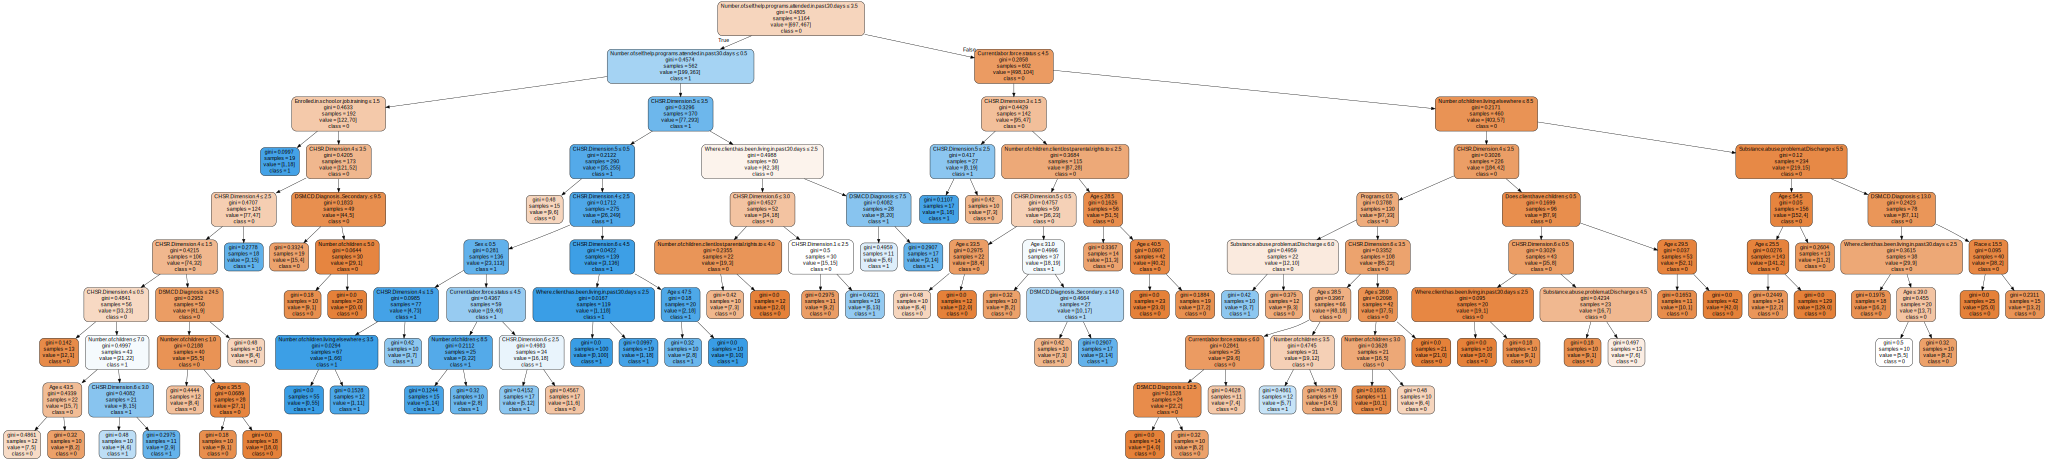

In [225]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None,
                                feature_names=features,
                                class_names=['0','1'],
                filled=True, rounded=True,
                special_characters=True)
graph = graphviz.Source(dot_data) 
graph

In [226]:

y_pred = clf_gini.predict(X_test)
y_pred

array([ 1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,
        0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,
        0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,
        0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,
        1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,
        0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
        0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0

In [227]:

y_pred_entropy = clf_gini_entropy.predict(X_test)
y_pred_entropy

array([ 1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
        0.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,
        0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,
        1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
        0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0

In [228]:
print( accuracy_score(y_test,y_pred)*100)

80.1369863014


In [229]:
print( accuracy_score(y_test,y_pred_entropy)*100)

81.5068493151


In [230]:
#

In [ ]:
X = avivo_data.values[:,1:6]
Y =  avivo_data.values[:,25]